In [1]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('nigeria_agricultural_exports.csv')

# Show the first 5 rows to understand the data structure
df.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [2]:
# Check data types and missing values
df.info()

# Check summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         1000 non-null   object 
 1   Company              1000 non-null   object 
 2   Export Country       1000 non-null   object 
 3   Date                 1000 non-null   object 
 4   Units Sold           1000 non-null   int64  
 5   unit_price           1000 non-null   float64
 6   Profit per unit      1000 non-null   float64
 7   Export Value         1000 non-null   float64
 8   Destination Port     1000 non-null   object 
 9   Transportation Mode  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


,Units Sold,unit_price,Profit per unit,Export Value
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,536.804000,30010.266660,6125.299550,1.631766e+07
std,251.311112,11515.423486,2269.844681,1.028734e+07
min,103.000000,10006.540000,2000.300000,1.323777e+06
25%,322.750000,20013.620000,4261.327500,7.669552e+06
50%,519.000000,30082.600000,6132.150000,1.441451e+07
75%,743.250000,39955.005000,8038.315000,2.262969e+07
max,999.000000,49985.860000,9990.570000,4.712082e+07


In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Check for duplicate rows
df_duplicates = df[df.duplicated()]

# If there are any, remove duplicates
df = df.drop_duplicates()


In [5]:
# Check for any missing values again
df.isnull().sum()


Product Name           0
Company                0
Export Country         0
Date                   0
Units Sold             0
unit_price             0
Profit per unit        0
Export Value           0
Destination Port       0
Transportation Mode    0
dtype: int64

In [6]:
import pandas as pd

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the Year from the Date column
df['Year'] = df['Date'].dt.year

# Group by Product Name and Year, and sum the Export Value for each product per year
product_export_value = df.groupby(['Year', 'Product Name'])['Export Value'].sum().reset_index()

# Calculate the percentage change in Export Value for each product
product_export_value['Percentage Change'] = product_export_value.groupby('Product Name')['Export Value'].pct_change() * 100

# Find the row with the highest percentage increase
max_increase = product_export_value.loc[product_export_value['Percentage Change'].idxmax()]

# Output the result
print(max_increase)


Year                         2021
Product Name             Plantain
Export Value         575150225.74
Percentage Change       47.114909
Name: 13, dtype: object


In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Load the dataset (Replace the path with your actual CSV file path)
df = pd.read_csv('nigeria_agricultural_exports.csv')

# Display the first 5 rows of the data to get an overview of the columns and data structure
df.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [9]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Extract the quarter from the Date column
df['Quarter'] = df['Month'].apply(lambda x: (x - 1) // 3 + 1)  # 1 = Q1, 2 = Q2, 3 = Q3, 4 = Q4


In [11]:
# Filter data for perishable products (replace with actual products from your dataset)
perishable_products = ['Plantain', 'Tomatoes', 'Cucumbers']  # Example products
df_perishable = df[df['Product Name'].isin(perishable_products)]

In [12]:
# Group by Month and calculate the total export value
monthly_export_value = df_perishable.groupby('Month')['Export Value'].sum().reset_index()

In [13]:
# Group by Quarter and calculate the total export value
quarterly_export_value = df_perishable.groupby('Quarter')['Export Value'].sum().reset_index()


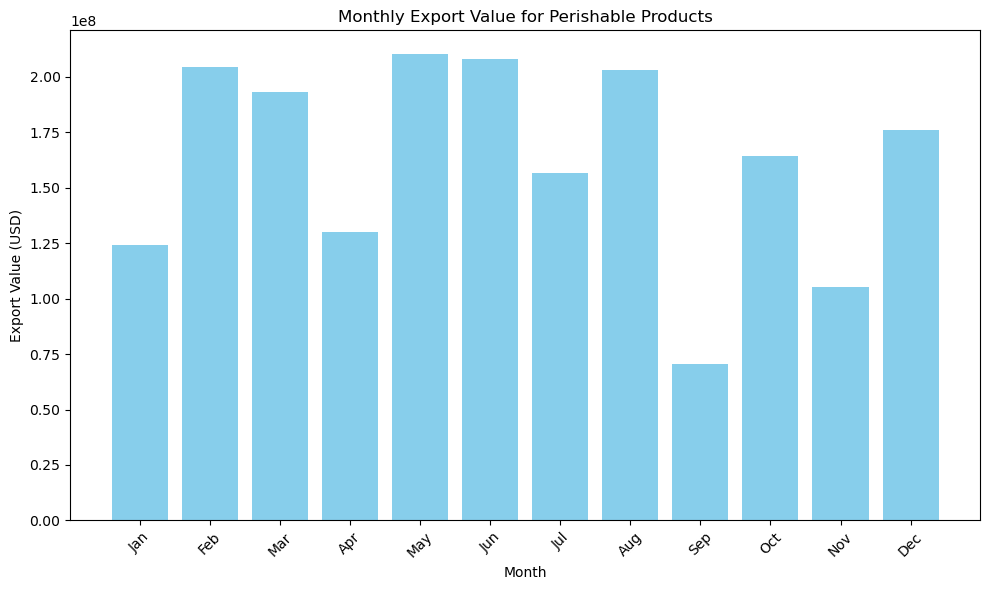

In [14]:
# Plotting the monthly export value
plt.figure(figsize=(10, 6))
plt.bar(monthly_export_value['Month'], monthly_export_value['Export Value'], color='skyblue')

# Add month labels
plt.xticks(monthly_export_value['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Add title and labels
plt.title('Monthly Export Value for Perishable Products')
plt.xlabel('Month')
plt.ylabel('Export Value (USD)')
plt.tight_layout()

# Show the plot
plt.show()


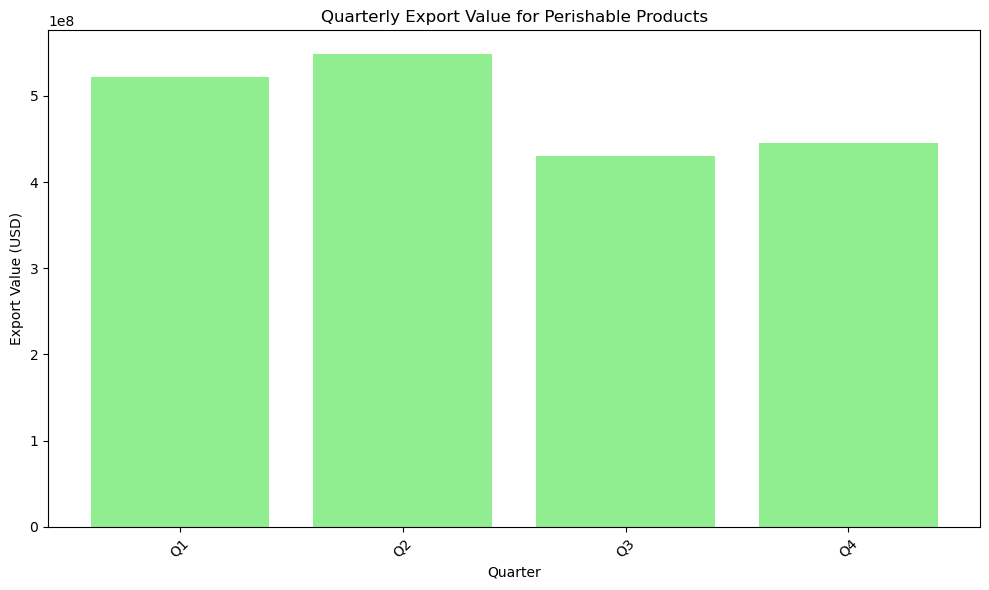

In [15]:
# Plotting the quarterly export value
plt.figure(figsize=(10, 6))
plt.bar(quarterly_export_value['Quarter'], quarterly_export_value['Export Value'], color='lightgreen')

# Add quarter labels
plt.xticks(quarterly_export_value['Quarter'], ['Q1', 'Q2', 'Q3', 'Q4'], rotation=45)

# Add title and labels
plt.title('Quarterly Export Value for Perishable Products')
plt.xlabel('Quarter')
plt.ylabel('Export Value (USD)')
plt.tight_layout()

# Show the plot
plt.show()


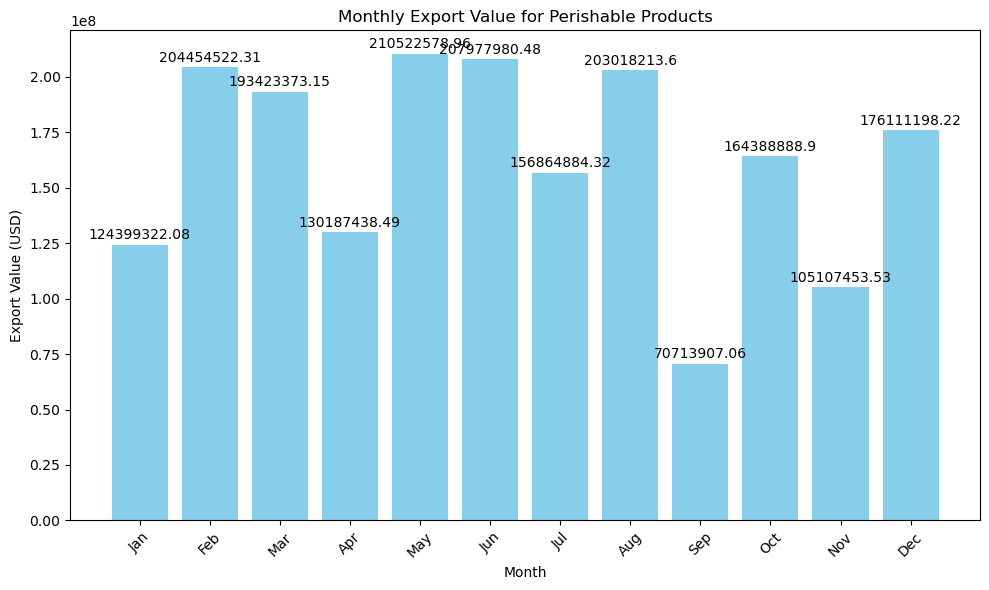

In [16]:
# Adding data labels on bars for monthly export value plot
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_export_value['Month'], monthly_export_value['Export Value'], color='skyblue')
plt.xticks(monthly_export_value['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Monthly Export Value for Perishable Products')
plt.xlabel('Month')
plt.ylabel('Export Value (USD)')
plt.tight_layout()

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000000, round(yval, 2), ha='center', va='bottom')

plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (use the correct file path)
df = pd.read_csv('nigeria_agricultural_exports.csv')

# Show the first few rows of the dataset
df.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [18]:
# Convert the 'Date' column to datetime format if it’s not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the 'Year' from the 'Date' column
df['Year'] = df['Date'].dt.year

# Check the first few rows to ensure the 'Year' column was correctly added
df.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Year
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,721,31443.05,5863.92,22670439.05,Lagos,Sea,2023
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,881,23151.97,5868.73,20396885.57,Lagos,Sea,2021
2,Cassava,Farmgate Nigeria Limited,Germany,2020-10-14,702,18536.45,5105.01,13012587.90,Calabar,Sea,2020
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,2022-12-31,191,21981.31,7781.54,4198430.21,Warri,Sea,2022
4,Sesame,Nigeria Agro Export Company,France,2022-12-19,373,13415.94,9590.95,5004145.62,Lagos,Sea,2022


In [19]:
# Group by Year and Product Name to calculate the total export value per product per year
df_grouped = df.groupby(['Year', 'Product Name'])['Export Value'].sum().reset_index()

# Show the first few rows to verify the grouping
df_grouped.head()


,Year,Product Name,Export Value
0,2020,Cashew,5.883474e+08
1,2020,Cassava,4.715388e+08
2,2020,Cocoa,4.893924e+08
3,2020,Ginger,3.304865e+08
4,2020,Palm Oil,5.095990e+08


In [20]:
# Sort the data by Year and Export Value in descending order
df_top_3 = df_grouped.sort_values(['Year', 'Export Value'], ascending=[True, False])

# For each year, get the top 3 products by export value
df_top_3 = df_top_3.groupby('Year').head(3).reset_index(drop=True)

# Show the top 3 products for each year
df_top_3.head()

,Year,Product Name,Export Value
0,2020,Sesame,6.038324e+08
1,2020,Cashew,5.883474e+08
2,2020,Palm Oil,5.095990e+08
3,2021,Rubber,6.584160e+08
4,2021,Cashew,6.057222e+08


In [21]:
# Calculate the total export value per year
total_export_value_per_year = df_grouped.groupby('Year')['Export Value'].sum().reset_index()

# Merge the total export value back to the top 3 products data
df_top_3_with_total = pd.merge(df_top_3, total_export_value_per_year, on='Year', suffixes=('_product', '_total'))

# Show the merged data to verify
df_top_3_with_total.head()


,Year,Product Name,Export Value_product,Export Value_total
0,2020,Sesame,6.038324e+08,3.891727e+09
1,2020,Cashew,5.883474e+08,3.891727e+09
2,2020,Palm Oil,5.095990e+08,3.891727e+09
3,2021,Rubber,6.584160e+08,4.461998e+09
4,2021,Cashew,6.057222e+08,4.461998e+09


In [22]:
# Calculate the share of total export value for each top 3 product
df_top_3_with_total['Share of Total'] = df_top_3_with_total['Export Value_product'] / df_top_3_with_total['Export Value_total'] * 100

# Show the final dataset with shares
df_top_3_with_total.head()


,Year,Product Name,Export Value_product,Export Value_total,Share of Total
0,2020,Sesame,6.038324e+08,3.891727e+09,15.515795
1,2020,Cashew,5.883474e+08,3.891727e+09,15.117899
2,2020,Palm Oil,5.095990e+08,3.891727e+09,13.094418
3,2021,Rubber,6.584160e+08,4.461998e+09,14.756080
4,2021,Cashew,6.057222e+08,4.461998e+09,13.575135


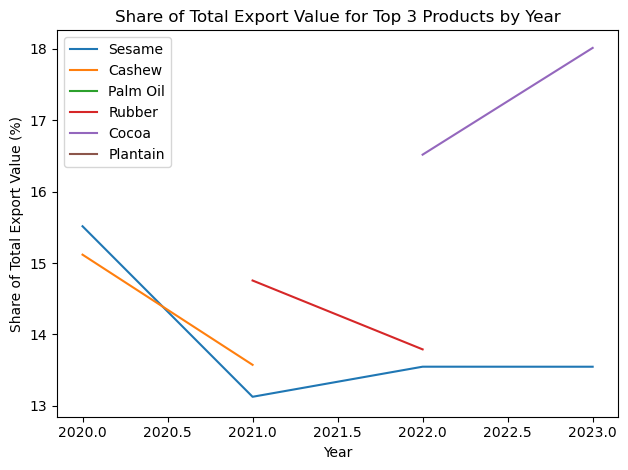

In [23]:
# Plot a line chart for each top product's share of total export value
for product in df_top_3_with_total['Product Name'].unique():
    product_data = df_top_3_with_total[df_top_3_with_total['Product Name'] == product]
    plt.plot(product_data['Year'], product_data['Share of Total'], label=product)

# Add title, labels, and legend
plt.title('Share of Total Export Value for Top 3 Products by Year')
plt.xlabel('Year')
plt.ylabel('Share of Total Export Value (%)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Most Consistent Exporter (Units Sold): Sweden
Lowest Year-to-Year Variance: 513543.58

Variance for All Countries (ascending):
Export Country
Sweden         5.135436e+05
Austria        1.808042e+06
Switzerland    3.505771e+06
Netherlands    4.217760e+06
Belgium        4.870180e+06
Denmark        6.958960e+06
Italy          7.154255e+06
France         7.898196e+06
Spain          1.019697e+07
Germany        1.546797e+07
dtype: float64

Top 10 Most Consistent Export Countries (by variance):
  Export Country      Variance        CV
0         Sweden  5.135436e+05  0.054927
1        Austria  1.808042e+06  0.103667
2    Switzerland  3.505771e+06  0.138877
3    Netherlands  4.217760e+06  0.162822
4        Belgium  4.870180e+06  0.170249
5        Denmark  6.958960e+06  0.176015
6          Italy  7.154255e+06  0.179005
7         France  7.898196e+06  0.197230
8          Spain  1.019697e+07  0.248262
9        Germany  1.546797e+07  0.325460


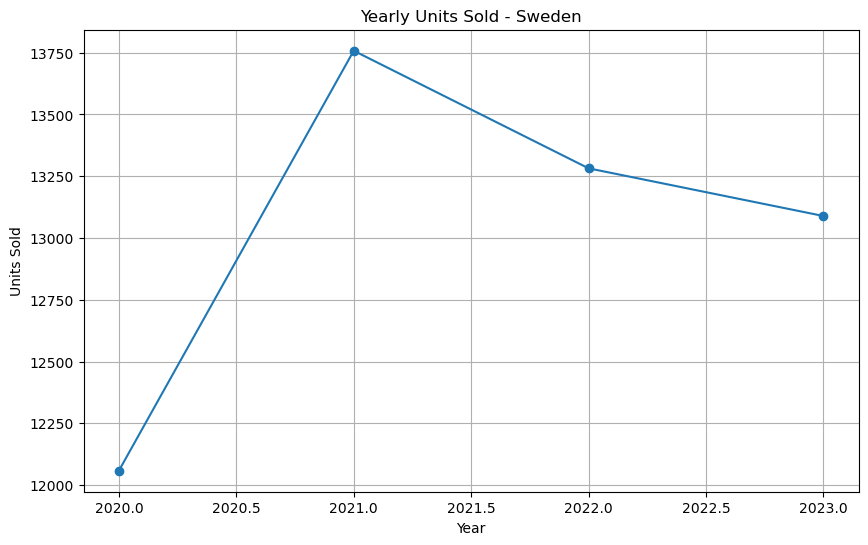

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# ======================
# 1. Load and preprocess
# ======================
df = pd.read_csv('nigeria_agricultural_exports.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# ===================================
# 2. Aggregate yearly exports (Units)
# ===================================
country_yearly = (
    df.groupby(['Export Country', 'Year'])['Units Sold']
      .sum()
      .reset_index()
)

# Pivot for easier analysis: Years as rows, Countries as columns
pivot = country_yearly.pivot(index='Year', columns='Export Country', values='Units Sold')

# ==================================
# 3. Calculate variance per country
# ==================================
country_variances = pivot.var()

most_consistent_country = country_variances.idxmin()  # Lowest variance
lowest_variance = country_variances.min()

print(f"Most Consistent Exporter (Units Sold): {most_consistent_country}")
print(f"Lowest Year-to-Year Variance: {lowest_variance:.2f}\n")

print("Variance for All Countries (ascending):")
print(country_variances.sort_values())

# ==============================================================
# 4. Extra: Variance, Mean & Coefficient of Variation (CV) table
# ==============================================================

country_stats = (
    country_yearly.groupby('Export Country')['Units Sold']
    .agg(['var', 'mean', 'count'])
    .reset_index()
)

country_stats = country_stats[country_stats['count'] >= 2]  # drop countries with only 1 year data
country_stats['CV'] = (country_stats['var'] ** 0.5) / country_stats['mean']
country_stats = country_stats.rename(columns={'var': 'Variance', 'mean': 'Average Units', 'count': 'Years Reported'})

most_consistent_countries = country_stats.sort_values('Variance').reset_index(drop=True)

print("\nTop 10 Most Consistent Export Countries (by variance):")
print(most_consistent_countries[['Export Country', 'Variance', 'CV']].head(10))

# =====================================
# 5. Plot for Most Consistent Country
# =====================================
plt.figure(figsize=(10, 6))
pivot[most_consistent_country].plot(marker='o')
plt.title(f"Yearly Units Sold - {most_consistent_country}")
plt.ylabel('Units Sold')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# =================================
# 6. OPTIONAL: Show full consistency ranking
# =================================
# print(most_consistent_countries[['Export Country', 'Variance', 'CV']])
